In [1]:
# Import librairies 
import pandas as pd
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
import seaborn as sn
import keras
from tensorflow.keras import layers
from keras.utils import np_utils
import tensorflow as tf
import requests
from sklearn.metrics import classification_report

In [2]:
# Load Data 
#to import data set
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
#load train set and test set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
#prepare data

num_classes = len(np.unique(Y_train))

# Scale images to the [0, 1] range
x_train = X_train.astype("float32") / 255
x_test = X_test.astype("float32") / 255

#make sure X shape is (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

In [5]:
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
y_train shape (60000, 10)
y_test shape (10000, 10)


In [6]:
def model_perf(model):
    y_pred = model.predict(x_test)
    Y_pred_labels = [np.argmax(i) for i in y_pred]
    score = model.evaluate(x_test, y_test, verbose=0)
    print("*****Test loss:", score[0],"*****")
    print("*****Test accuracy:", score[1],"*****")
    cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred_labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [7]:
def plot_loss(history):
    plt.plot(history.history['loss'], color='b')
    plt.plot(history.history['val_loss'], color='r')
    plt.title('model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()


    plt.plot(history.history['accuracy'], color='b')
    plt.plot(history.history['val_accuracy'], color='r')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()

#### Test 1

In [8]:
# build model
input_shape = (28,28,1)

model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [9]:
batch_size = 128

epochs = 15

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 77s 175ms/step - loss: 0.3643 - accuracy: 0.9048 - val_loss: 0.1295 - val_accuracy: 0.9655
Epoch 2/15
422/422 [==============================] - 59s 139ms/step - loss: 0.1176 - accuracy: 0.9676 - val_loss: 0.0806 - val_accuracy: 0.9787
Epoch 3/15
422/422 [==============================] - 51s 120ms/step - loss: 0.0811 - accuracy: 0.9779 - val_loss: 0.0664 - val_accuracy: 0.9827
Epoch 4/15
422/422 [==============================] - 60s 142ms/step - loss: 0.0660 - accuracy: 0.9813 - val_loss: 0.0607 - val_accuracy: 0.9835
Epoch 5/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0561 - accuracy: 0.9838 - val_loss: 0.0525 - val_accuracy: 0.9860
Epoch 6/15
422/422 [==============================] - 44s 103ms/step - loss: 0.0502 - accuracy: 0.9857 - val_loss: 0.0537 - val_accuracy: 0.9852
Epoch 7/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0448 - accuracy: 0.9870 - val_loss: 0.0560 - val_ac

313/313 [==============================] - 5s 16ms/step
*****Test loss: 0.05527639761567116 *****
*****Test accuracy: 0.9832000136375427 *****


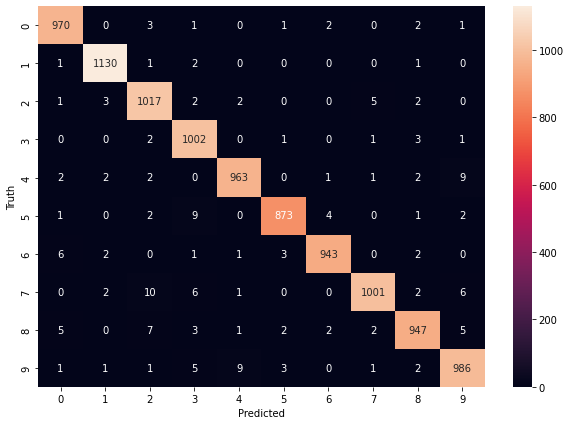

In [10]:
model_perf(model1)

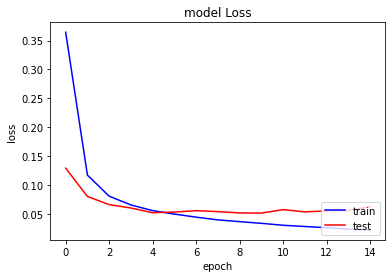

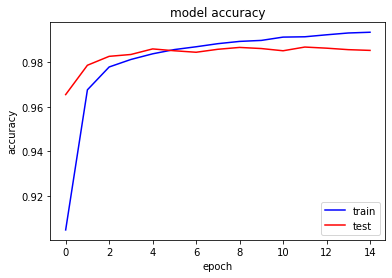

In [11]:
plot_loss(history1)

In [14]:
model1.save('/home/wiem/Document/laplateforme/Digits-Classification/digit-appli/temp/model.h5')

## Test 2

In [12]:
# build model
input_shape = (28,28,1)

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [13]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
 81/422 [====>.........................] - ETA: 59s - loss: 0.9894 - accuracy: 0.7215 

KeyboardInterrupt: 

In [ ]:
model_perf(model2)

In [ ]:
plot_loss(history2)

## Test 3

In [ ]:
# build model

model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()

In [ ]:
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3 = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)

In [ ]:
model_perf(model3)

In [ ]:
plot_loss(history3)

In [ ]:
model3.save('/home/wiem/Document/laplateforme/Digits-Classification/digit-appli/temp')

In [ ]:
model_digits = keras.models.load_model('/home/wiem/Document/laplateforme/Digits-Classification/digit-appli/temp')

In [ ]:
model_digits

In [ ]:
model3.save('model.h5')

## Test 4

In [ ]:
model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
        
    ]
)

model4.summary()

In [ ]:
model4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history4 = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)

In [ ]:
model_perf(model4)

In [ ]:
plot_loss(history4)